In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Hands-on implementation of support vector regression in Python**

In this implementation, we have taken a dummy dataset that comprises the designations, years of experience and salaries of 10 employees of a company. We will try to fit a relationship between the years of experience and the salaries of the employees. For this purpose, we will train a support vector regressor on the dataset. Once trained, this model can predict the salary of a new person by giving the experience as input.

This hands-on implementation will be done in the following steps.

Step 1:  Reading the dataset

As a first step, we will read the dataset that is saved in a CSV file.

importing needed libraries

In [2]:
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv(
    'https://gitlab.com/AnalyticsIndiaMagazine/practicedatasets/-/raw/main/bootcamp/polynomial_regression/Experience_Salaries.csv'
    )

After reading the dataset, let us have a look at it. As it has fewer records, we will print the entire dataset.

In [4]:
print(dataset)

                 Designation  Experience  Salary
0            Sales Executive           1   50000
1            Office Asistant           2   55000
2          Software Engineer           3   85000
3              Sales Manager           4  100000
4          Assistant Manager           5  125000
5                    HR Head           7  120000
6  Technical Project Manager           9  135000
7             Senior Manager          10  140000
8             Marketing Head          12  120000
9                   Director          15  220000


**Step 2: Defining the input-output feature**

After reading the dataset, let us define the input and output features as X and y respective

In [5]:
# defining training features (X and y)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

Now, let us have a look at input and output features.

In [6]:
# Checking the input feature
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 7]
 [ 9]
 [10]
 [12]
 [15]]


In [7]:
# Checking the output feature
print(y)

[ 50000  55000  85000 100000 125000 120000 135000 140000 120000 220000]


In [8]:
# Reshaping the output feature
y = y.reshape(len(y),1)
# Reshaped feature
print(y)

[[ 50000]
 [ 55000]
 [ 85000]
 [100000]
 [125000]
 [120000]
 [135000]
 [140000]
 [120000]
 [220000]]


Step 3: Feature scaling

To train the support vector machine, first, we will scale the features using standardization. 

In [9]:
# Standardizing the input and output features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

Let us check how the features look after standardization. 

In [10]:
# Standardized input values
print(X)

[[-1.32504382]
 [-1.09658799]
 [-0.86813216]
 [-0.63967633]
 [-0.4112205 ]
 [ 0.04569117]
 [ 0.50260283]
 [ 0.73105866]
 [ 1.18797032]
 [ 1.87333782]]


In [11]:
# Standardized output values
print(y)

[[-1.41337749]
 [-1.30465615]
 [-0.65232807]
 [-0.32616404]
 [ 0.21744269]
 [ 0.10872135]
 [ 0.43488538]
 [ 0.54360673]
 [ 0.10872135]
 [ 2.28314826]]


**Step 4: Defining and training the support vector regression model**

As we have the pre-processed data for training, now in this step we will define the support vector machine for regression and train this regressor with the training data.

In [12]:
# Defining the support vector regressor
from sklearn.svm import SVR

In [13]:
# Training the support vector regressor
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

The above model output shows the values of the parameters of the fitted support vector regressor.  

**Step 5: Visualizing the SVM performance in regression**

Let us check how the performance of support vector regression looked during training.

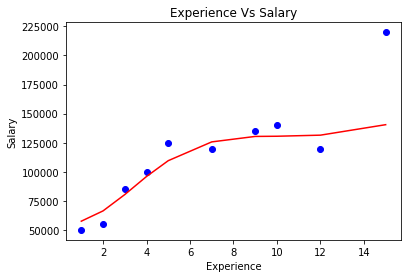

In [14]:
# Performance of regressor on the training data
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'blue')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = 'red')
plt.title('Experience Vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

Step 6: Making predictions with a random input

As we have trained the support vector machine for regression, we will check the prediction made by this model on a random experience as input.

In [15]:
# Predicting salary for a random experience
sc_y.inverse_transform(regressor.predict(sc_X.transform([[3.5]])).reshape(1, -1))

array([[88225.43336041]])

We can see in the output, the model has predicted a salary of 88225.43 for a person with experience 3.5 which looks relevant and somewhat correct as per the main dataset.

